# Задание 5

Продолжим изучать наш сервис и рассчитаем несколько показателей, связанных с заказами.

Задание:

Для каждого дня, представленного в таблице user_actions, рассчитайте следующие показатели:

1. Общее число заказов.
2. Число первых заказов (заказов, сделанных пользователями впервые).
3. Число заказов новых пользователей (заказов, сделанных пользователями в тот же день, когда они впервые воспользовались сервисом).
4. Долю первых заказов в общем числе заказов (долю п.2 в п.1).
5. Долю заказов новых пользователей в общем числе заказов (долю п.3 в п.1).
Колонки с показателями назовите соответственно orders, first_orders, new_users_orders, first_orders_share, new_users_orders_share. Колонку с датами назовите date. Проследите за тем, чтобы во всех случаях количество заказов было выражено целым числом. Все показатели с долями необходимо выразить в процентах. При расчёте долей округляйте значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты.

Поля в результирующей таблице: date, orders, first_orders, new_users_orders, first_orders_share, new_users_orders_share

```sql
with column_1 AS (
  SELECT
    time :: date AS date,
    COUNT(order_id) AS orders
  FROM
    user_actions
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
  ORDER BY
    1
),
column_2 AS (
  SELECT
    time :: date AS date,
    COUNT(DISTINCT user_id) AS first_orders
  FROM
    user_actions
  WHERE
    order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
    AND (user_id, time :: date) in (
      SELECT
        DISTINCT user_id,
        min(time :: date)
      FROM
        user_actions
      WHERE
        order_id NOT in (
          SELECT
            order_id
          FROM
            user_actions
          WHERE
            action = 'cancel_order'
        )
      GROUP BY
        user_id
    )
  GROUP BY
    1
),
column_3 AS (
  SELECT
    time :: date AS date,
    COUNT(DISTINCT user_actions.order_id) AS new_users_orders
  FROM
    user_actions
    JOIN (
      SELECT
        user_id,
        MIN(time :: date) AS first_date
      FROM
        user_actions
      GROUP BY
        user_id
    ) AS first_orders on user_actions.user_id = first_orders.user_id
  WHERE
    user_actions.time :: date = first_orders.first_date
    AND order_id NOT in (
      SELECT
        order_id
      FROM
        user_actions
      WHERE
        action = 'cancel_order'
    )
  GROUP BY
    1
)
SELECT
  *,
  ROUND(first_orders / orders :: decimal * 100, 2) AS first_orders_share,
  ROUND(new_users_orders / orders :: decimal * 100, 2) AS new_users_orders_share
FROM
  column_1
  JOIN column_2 using (date)
  JOIN column_3 using (date)
ORDER BY
  1
```

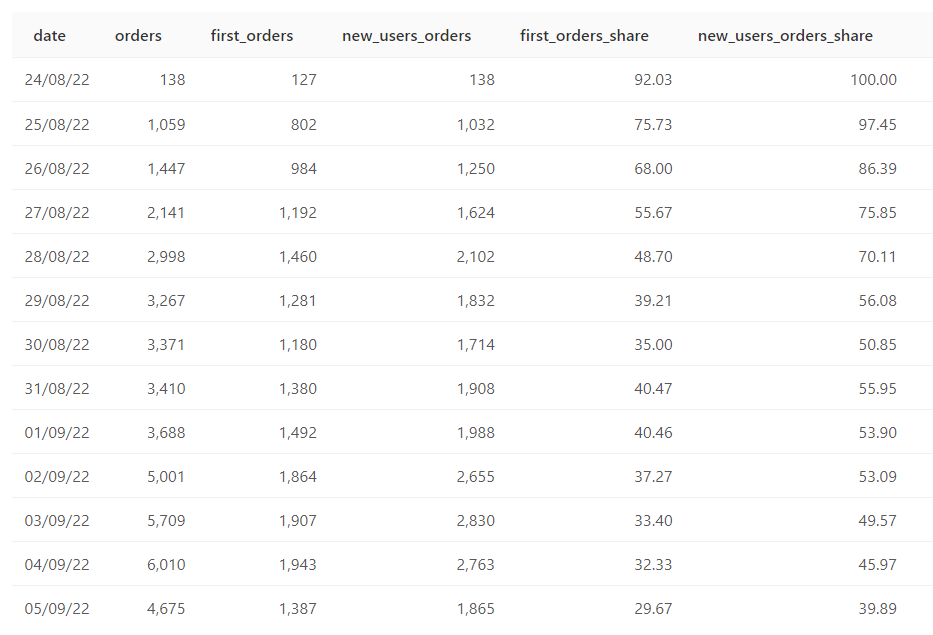

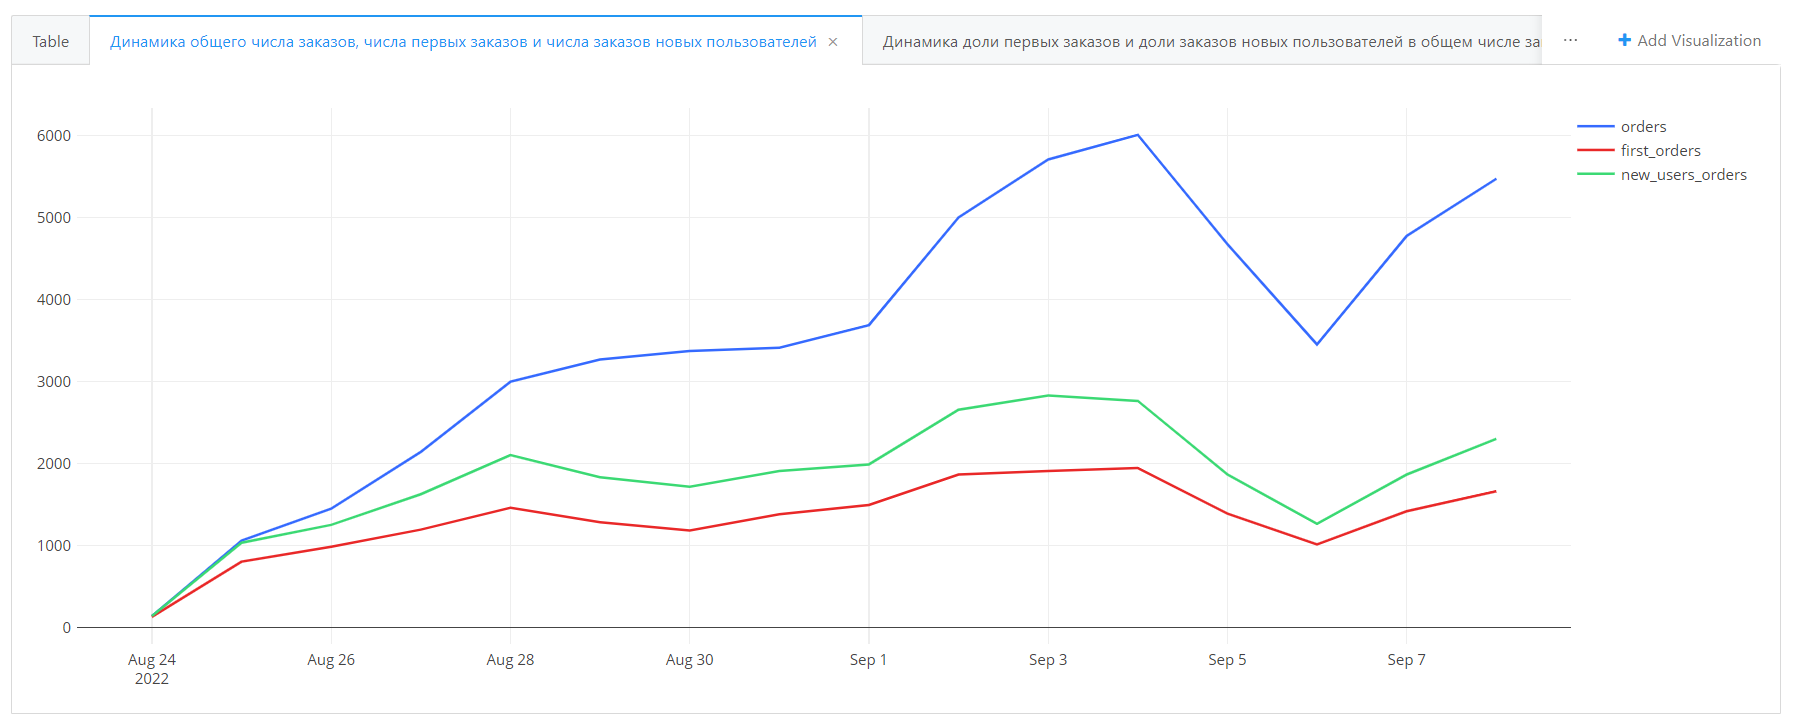

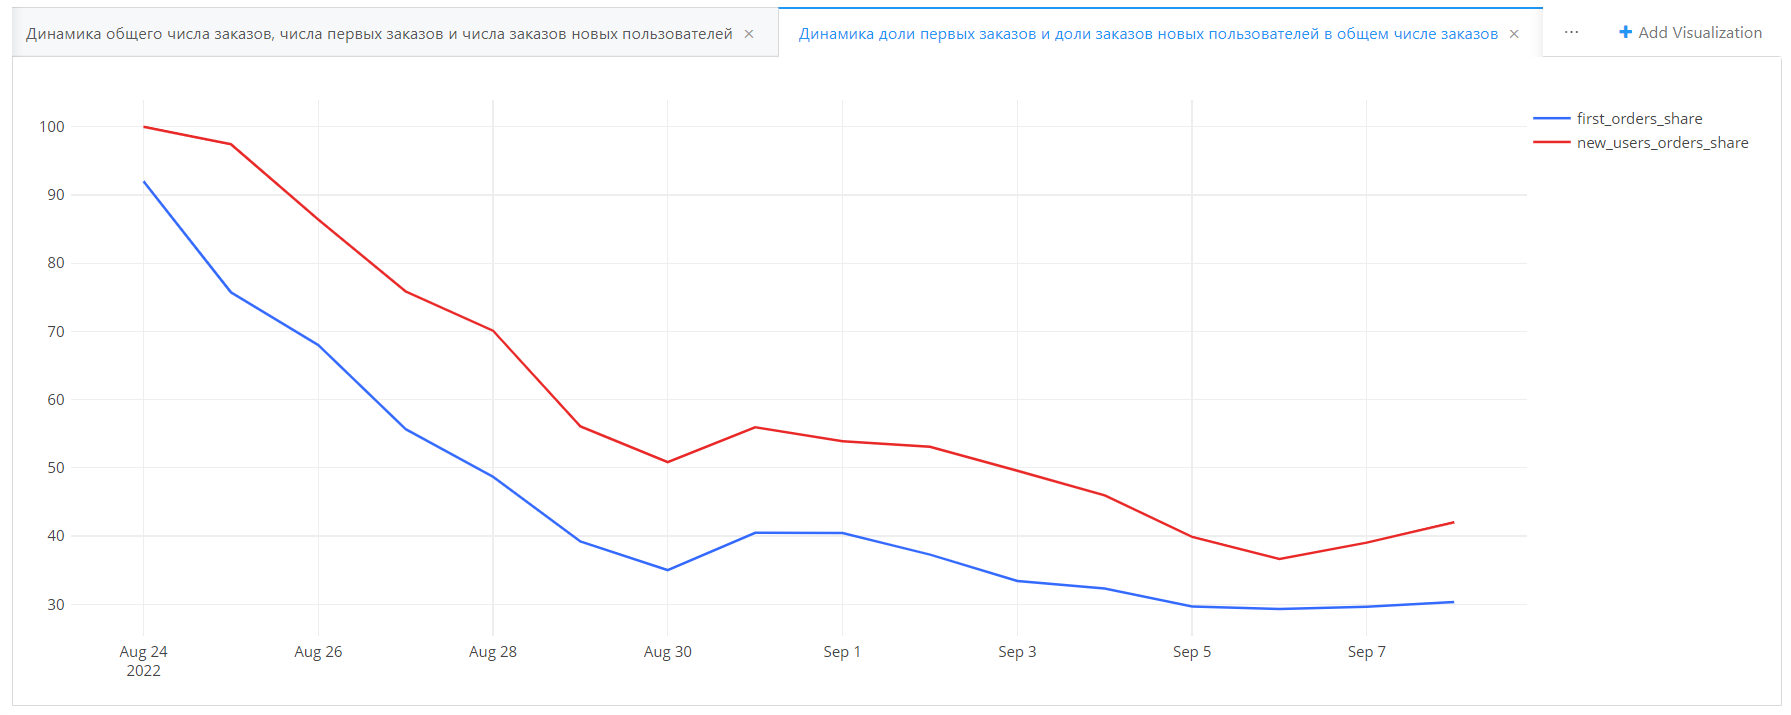